In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Arnav/Desktop/internship/PROJECT 2/datasets/fastFood.csv")

# Data Profiling

In [3]:
A.head(7)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female


In [4]:
Mcd = pd.DataFrame(A.columns) #different segments displayed

In [5]:
Mcd

,0
0,yummy
1,convenient
2,spicy
3,fattening
4,greasy
5,fast
6,cheap
7,tasty
8,expensive
9,healthy


In [6]:
A.shape

(1453, 15)

In [7]:
A.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
A.describe() #generates a full summary of the data set

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


    The mean age that visit Mcd = 44 
    The minimum age that visit Mcd = 18
    The maximum age that visit Mcd = 71

# Data Cleaning

In [9]:
A.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

There are no missing values in the given dataset

# Exploratory Data Analysis

In [10]:
A.corr()

,Age
Age,1.0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:xlabel='Age', ylabel='Gender'>

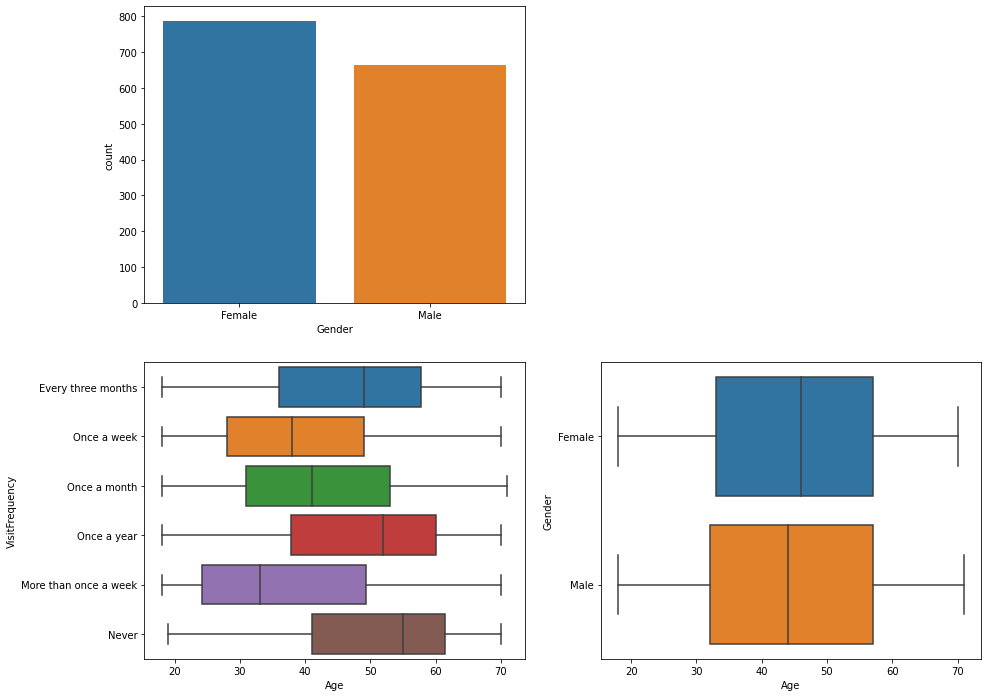

In [12]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sb.countplot(A.Gender)
# plt.subplot(2,2,2)
# sb.histplot(A.Age)
plt.subplot(2,2,3)
sb.boxplot(A.Age,A.VisitFrequency)
plt.subplot(2,2,4)
sb.boxplot(A.Age,A.Gender)

# Insights Generated

Plot-1: More females visit Mcd than the males

<AxesSubplot:xlabel='VisitFrequency', ylabel='count'>

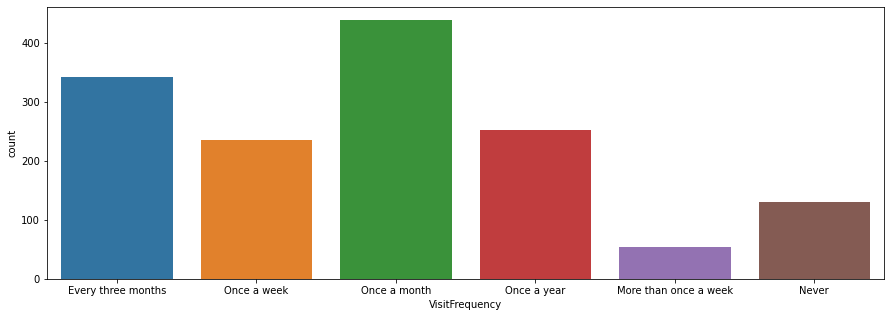

In [13]:
plt.rcParams['figure.figsize'] = [15, 5]
sb.countplot(A.VisitFrequency)

<AxesSubplot:xlabel='Age', ylabel='count'>

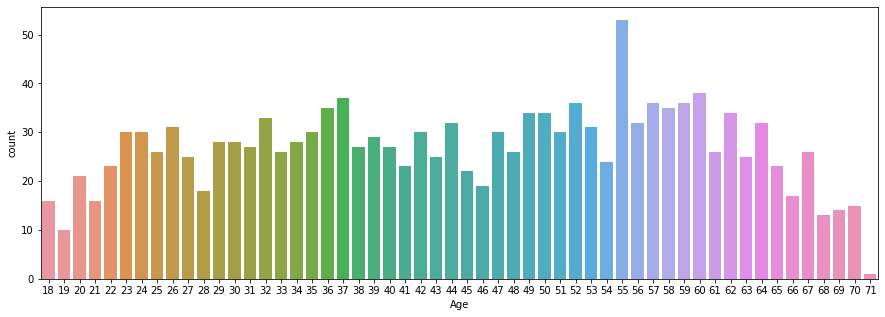

In [14]:
sb.countplot(A.Age)

<AxesSubplot:xlabel='disgusting', ylabel='count'>

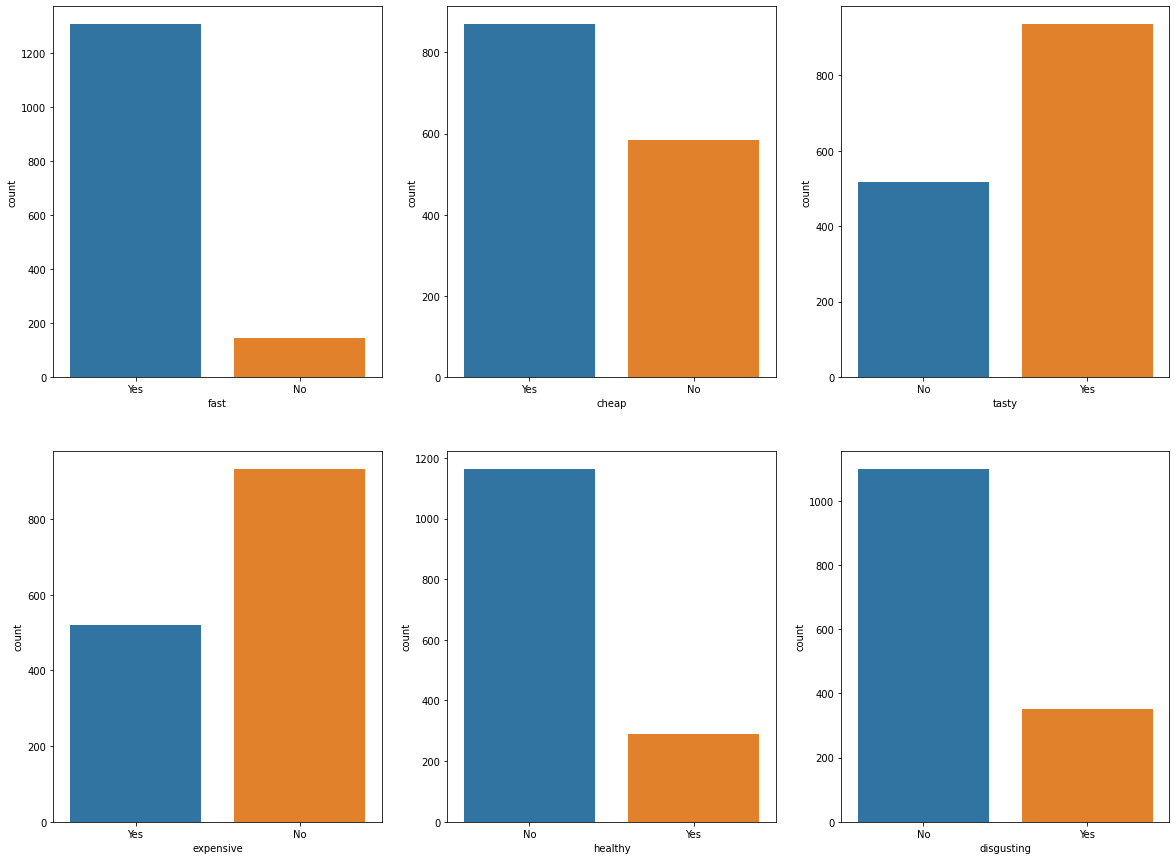

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sb.countplot(A.fast)
plt.subplot(2,3,2)
sb.countplot(A.cheap)
plt.subplot(2,3,3)
sb.countplot(A.tasty)
plt.subplot(2,3,4)
sb.countplot(A.expensive)
plt.subplot(2,3,5)
sb.countplot(A.healthy)
plt.subplot(2,3,6)
sb.countplot(A.disgusting)

# PRE-PROCESSING

Converting categorical to numeric using Label Encoder

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat= ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for i in cat:
    A[i] = le.fit_transform(A[i])

In [17]:
A

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [18]:
scale_mapper = {"I hate it!-5" :1, "-4":2, "-3":3, "-2":4, "-1":5, "0":6, "+1":7, "+2":8, "+3":9, "+4":10, "I love it!+5":11}
A["Like"] = A["Like"].replace(scale_mapper)

scale_mapper_visit = {"Once a month":1, "Every three months":3, "Once a year":3, "Once a week": 4, "Never" : 0, "More than once a week":5}
A["VisitFrequency"] = A["VisitFrequency"].replace(scale_mapper_visit)

scale_mapper_gender = {"Male":1, "Female":0}
A["Gender"] = A["Gender"].replace(scale_mapper_gender)

In [19]:
# A

In [20]:
A.drop(columns=['yummy'],inplace=True) #dropping similar columns 

ANOVA test for checking correlation of categorical features

In [21]:
for i in A:
    from statsmodels.formula.api import ols
    rel = "Age ~ " + str(i)
    model = ols(rel,A).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    print(rel,"--->  ",round(anova_results.iloc[0,4],4))

Age ~ convenient --->   0.0071
Age ~ spicy --->   0.0
Age ~ fattening --->   0.0
Age ~ greasy --->   0.0
Age ~ fast --->   0.4336
Age ~ cheap --->   0.5184
Age ~ tasty --->   0.0
Age ~ expensive --->   0.0069
Age ~ healthy --->   0.4158
Age ~ disgusting --->   0.4104
Age ~ Like --->   0.0
Age ~ Age --->   0.0
Age ~ VisitFrequency --->   0.0004
Age ~ Gender --->   0.4496


# Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(A)
pca_samples = pca.transform(A)

pca = pd.DataFrame(pca_samples)
pca.head()

,0,1,2,3,4,5
0,-16.584121,2.695764,1.129371,-0.147622,-0.081542,0.647280
1,-6.298764,-1.661955,0.508145,0.155817,-0.799400,-0.195581
2,-17.339826,-1.335013,0.660527,0.795326,-0.705576,0.143794
3,-24.145287,-4.719469,1.306252,-0.196898,-1.058203,-0.768220
4,-4.329993,-1.271587,-1.461542,-0.288473,0.244189,-0.706069


(1453, 2)
          4         1
0 -0.081542  2.695764
1 -0.799400 -1.661955
2 -0.705576 -1.335013
3 -1.058203 -4.719469
4  0.244189 -1.271587


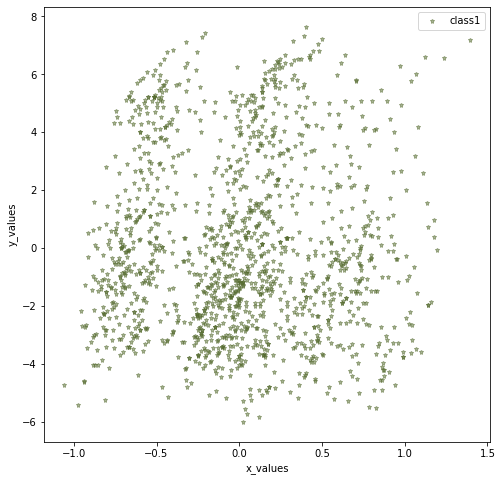

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

tocluster = pd.DataFrame(pca[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], '*', markersize=5, color='darkolivegreen', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

# Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Anew=ss.fit_transform(A)

Anew

array([[ 0.31873518, -0.32134871,  0.39137527, ...,  1.15325815,
         0.46063389, -0.918645  ],
       [ 0.31873518, -0.32134871,  0.39137527, ...,  0.44983942,
         0.46063389, -0.918645  ],
       [ 0.31873518,  3.11188424,  0.39137527, ...,  1.22360002,
         0.46063389, -0.918645  ],
       ...,
       [ 0.31873518, -0.32134871,  0.39137527, ...,  0.5201813 ,
        -0.98182526, -0.918645  ],
       [ 0.31873518, -0.32134871, -2.55509245, ..., -0.2535793 ,
         0.46063389,  1.08855979],
       [ 0.31873518, -0.32134871,  0.39137527, ..., -1.0273399 ,
         0.46063389,  1.08855979]])

In [25]:
import sklearn
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.preprocessing import scale

hop=hopkins(Anew,150)
print(hop)

0.20442086086980238


In [26]:
import numpy as np

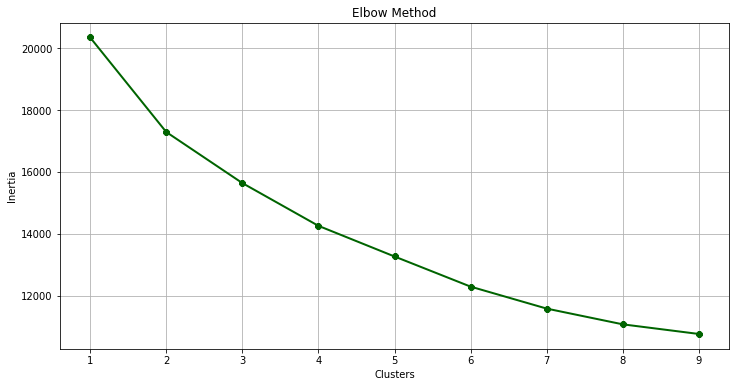

In [27]:
clusters = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Anew)
    clusters.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,10),clusters, linewidth=2, color="darkgreen", marker ="8")
plt.xlabel("Clusters")
plt.xticks(np.arange(1,10,1))
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show()

# Implementing K means clustering

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Anew)

clusters=kmeans.cluster_centers_
print(clusters)

[[-3.13740077e+00 -1.14170864e-01  1.03665149e-02  4.30369552e-01
  -9.03817057e-01 -5.18074094e-01 -1.14745845e+00  5.84197801e-01
  -3.68700171e-01  1.32303288e+00 -1.43910185e+00  2.91570209e-01
  -6.08775481e-01  1.88778331e-01]
 [ 2.75261772e-01  7.81154975e-02  3.54312785e-01  1.42174525e-01
  -1.18197191e-01 -1.00987130e+00  3.95081059e-01  1.24109077e+00
  -3.34799215e-02 -3.17181820e-01  3.91505944e-01 -2.77911399e-01
   7.50709124e-02  1.73324901e-01]
 [ 2.81236418e-01 -9.78471115e-02  3.91375272e-01 -1.59909281e-01
   2.36418565e-01  6.63653956e-01  4.86360724e-01 -7.42781124e-01
   4.05315124e-05 -4.73724385e-01  4.81312764e-01 -1.76623006e-01
   1.01975424e-01 -1.70933993e-01]
 [ 1.55131112e-01  1.05266032e-01 -2.55509245e+00 -9.00412875e-01
   9.60469114e-02  1.90853133e-01  3.84781599e-01 -3.14532748e-01
   1.05819850e+00 -4.97501710e-01  6.31801893e-01  3.81578671e-01
   1.70435011e-01  1.26526724e-01]
 [ 3.18735180e-01  8.32410279e-02  3.41771438e-01  4.89781958e-01
  

In [29]:
y_prediction = kmeans.fit_predict(Anew)
print(y_prediction)

[2 1 1 ... 1 4 3]


# The clusters formed are: [2 1 1 ... 1 4 3]

In [32]:
y_prediction

array([2, 1, 1, ..., 1, 4, 3])